# Advanced MLP
- Advanced techniques for training neural networks
  - Weight Initialization
  - Nonlinearity (Activation function)
  - Optimizers
  - Batch Normalization
  - Dropout (Regularization)
  - Model Ensemble

In [1]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras import optimizers
from keras.layers import Dropout
import numpy as np
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from keras.layers import BatchNormalization

Using TensorFlow backend.


## Load Dataset
- MNIST dataset

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print(X_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


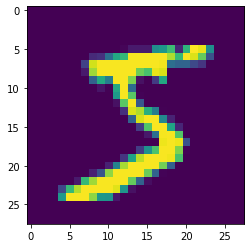

Label:  5


In [4]:
plt.imshow(X_train[0])    # show first number in the dataset
plt.show()
print('Label: ', y_train[0])

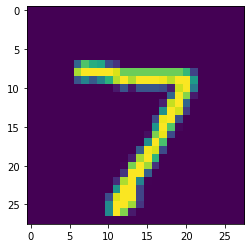

Label:  7


In [5]:
plt.imshow(X_test[0])    # show first number in the dataset
plt.show()
print('Label: ', y_test[0])

In [6]:
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], -1))
X_test = X_test.reshape((X_test.shape[0], -1))

In [7]:
# use only 33% of training data to expedite the training process
X_train, _ , y_train, _ = train_test_split(X_train, y_train, test_size = 0.67, random_state = 7)

In [8]:
# converting y data into categorical (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(19800, 784) (10000, 784) (19800, 10) (10000, 10)


# Basic MLP model

In [10]:
model = Sequential()

In [11]:
model.add(Dense(50, input_shape = (784, )))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [12]:
sgd = optimizers.SGD(lr = 0.001) #Adam하면 금방 올라감
model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [13]:
history = model.fit(X_train, y_train, batch_size = 256, validation_split = 0.3, epochs = 200, verbose = 0)

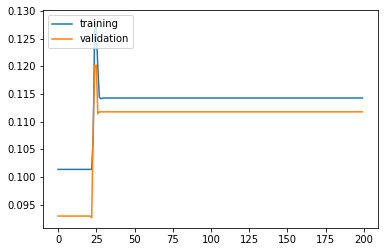

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [15]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 19us/step


In [16]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 1. Weight Initialization



- Xavier
- Uniform distribution : sqrt( 6 / (fan_in + fan_out))
- Normal distribution  : N(0, sqrt(2. / (fan_in + fan_out)))

- HE
- Uniform distribution : limit is sqrt( 6 / fan_in)
- Normal distribution : N(0, sqrt(2 / fan_in))

In [17]:
# from now on, create a function to generate (return) models
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))     # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(50, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('sigmoid'))    
    model.add(Dense(10, kernel_initializer='he_normal'))                            # use he_normal initializer
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [18]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

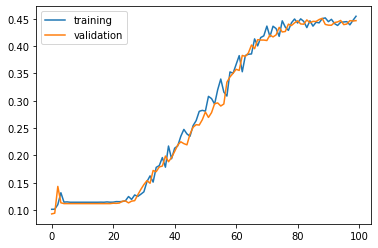

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy seems to improve after around 60 epochs

In [20]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [21]:
print('Test accuracy: ', results[1])

Test accuracy:  0.4359000027179718


## 2. Nonlinearity (Activation function)

In [22]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(50))
    model.add(Activation('relu'))    # use relu
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [23]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

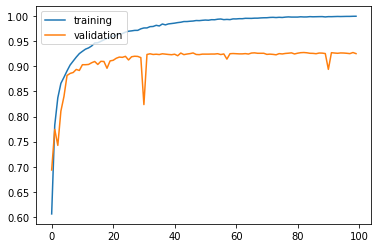

In [24]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach a plateau after around 30 epochs

In [25]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 21us/step


In [26]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9239000082015991


## 3. Optimizers


In [27]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))  
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)                     # use Adam optimizer
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [28]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

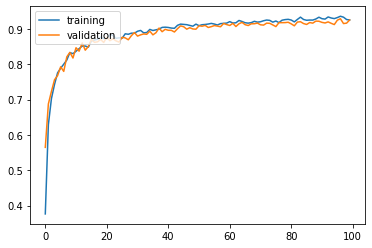

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve instantaneously, but reach plateau after around 50 epochs

In [30]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 20us/step


In [31]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9194999933242798


## 4. Batch Normalization

비선형 변환 전에 추가

In [32]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(BatchNormalization())       
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [33]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

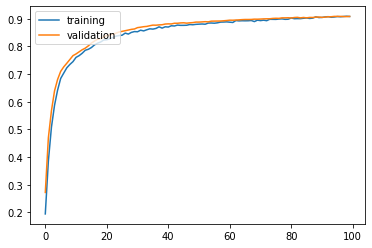

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

Training and validation accuracy improve consistently, but reach plateau after around 60 epochs

In [35]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 27us/step


In [36]:
print('Test accuracy: ', results[1])

Test accuracy:  0.9132999777793884


## 5. Dropout (Regularization)

In [54]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                        # Dropout layer after Activation
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dropout(0.2))                         # Dropout layer after Activation
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [55]:
model = mlp_model()
history = model.fit(X_train, y_train, validation_split = 0.3, epochs = 100, verbose = 0)

ValueError: Error when checking target: expected activation_50 to have shape (10,) but got array with shape (1,)

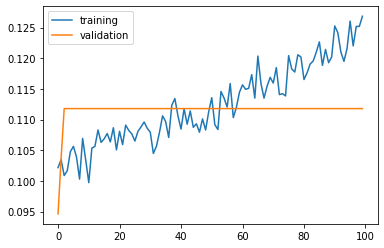

In [39]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training', 'validation'], loc = 'upper left')
plt.show()

In [40]:
results = model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 23us/step


In [41]:
print('Test accuracy: ', results[1])

Test accuracy:  0.11349999904632568


## 6. Model Ensemble

In [42]:
y_train = np.argmax(y_train, axis = 1)
y_test = np.argmax(y_test, axis = 1)

In [43]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, )))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(50))
    model.add(Activation('sigmoid'))    
    model.add(Dense(10))
    model.add(Activation('softmax'))
    
    sgd = optimizers.SGD(lr = 0.001)
    model.compile(optimizer = sgd, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [44]:
model1 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model2 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)
model3 = KerasClassifier(build_fn = mlp_model, epochs = 100, verbose = 0)

In [45]:
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3)], voting = 'soft')

In [46]:
ensemble_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('model1',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000263EFDE3B48>),
                             ('model2',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000263EFDE3488>),
                             ('model3',
                              <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000263EFDE3A88>)],
                 flatten_transform=True, n_jobs=None, voting='soft',
                 weights=None)

In [47]:
y_pred = ensemble_clf.predict(X_test)

In [48]:
print('Test accuracy:', accuracy_score(y_pred, y_test))

Test accuracy: 0.2807


# Advanced MLP - 2
    - More training set
    - Weight Initialization scheme
    - Nonlinearity (Activation function)
    - Optimizers: adaptvie
    - Batch Normalization
    - Dropout (Regularization)
    - Model Ensemble

In [49]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshaping X data: (n, 28, 28) => (n, 784)
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1] * X_train.shape[2]))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1] * X_test.shape[2]))
# We use all training data and validate on all test data
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 784)
(10000, 784)
(60000,)
(10000,)


In [50]:
def mlp_model():
    model = Sequential()
    
    model.add(Dense(50, input_shape = (784, ), kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))    
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(50, kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Dropout(0.2))
    model.add(Dense(10, kernel_initializer='he_normal'))
    model.add(Activation('softmax'))
    
    adam = optimizers.Adam(lr = 0.001)
    model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
    
    return model

In [51]:
# create 5 models to ensemble
from keras.callbacks import LambdaCallback
from keras.callbacks import EarlyStopping
from keras.layers import LeakyReLU


def lambdaf_(epoch, logs, step) : 
    if epoch % step == 0 : print(f"{epoch} => {logs}")                
        
def printepoch(step) :   
    return LambdaCallback(on_epoch_end=lambda epoch, logs: lambdaf_(epoch, logs, step)  )

model1 = KerasClassifier(build_fn = mlp_model, epochs = 3, callbacks=[])
model2 = KerasClassifier(build_fn = mlp_model, epochs = 3, callbacks=[])
model3 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model4 = KerasClassifier(build_fn = mlp_model, epochs = 3)
model5 = KerasClassifier(build_fn = mlp_model, epochs = 3)



In [52]:
#ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2), ('model3', model3), ('model4', model4), ('model5', model5)], voting = 'soft')
ensemble_clf = VotingClassifier(estimators = [('model1', model1), ('model2', model2)], voting = 'soft')

In [53]:
ensemble_clf.fit(X_train, y_train)

RuntimeError: Cannot clone object <keras.wrappers.scikit_learn.KerasClassifier object at 0x00000263F30E9BC8>, as the constructor either does not set or modifies parameter callbacks

In [ ]:
y_pred = ensemble_clf.predict(X_test)

In [ ]:
print('Acc: ', accuracy_score(y_pred, y_test))